## Introduction

This notebook is focus on "final_analytics_takehome.xlsx" dataset for EDA using python3.5. Without a specific goal, this notebook covers the following topic:
1. Data Understanding
2. Error Correction
3. Data Exploration
4. Decision tree model to understand what features affect rating
5. Suggestions

## Part 1:  Data Understanding


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import seaborn as sns
# sns.color_palette("Set2")

In [2]:
data = pd.read_excel('final_analytics_takehome.xlsx')

In [3]:
data.head()

,user_id,car_id,start_time,end_time,num_riders,region,num_near_misses,price,rating
0,9,spiderman,2018-10-02 03:00:21,2018-10-02 03:08:19,3,sf,0,3.25,5
1,12,superman,2018-10-02 03:01:30,2018-10-02 03:09:16,2,sf,0,2.95,5
2,3,hulk,2018-10-02 03:01:45,2018-10-02 03:09:15,2,sf,0,3.22,5
3,10,spiderman,2018-10-02 03:02:08,2018-10-02 03:15:34,3,sf,0,2.29,5
4,9,scarecrow,2018-10-02 03:02:13,2018-10-02 04:02:47,4,sf,0,2.93,1


In [4]:
print(data.shape)
data.describe(include = 'all')

(1033, 9)


,user_id,car_id,start_time,end_time,num_riders,region,num_near_misses,price,rating
count,1033.000000,1033,1033,1033,1033.000000,1033,1033.000000,1033.000000,1033.000000
unique,NaN,9,1028,1027,NaN,2,NaN,NaN,NaN
top,NaN,hulk,2018-10-02 09:00:07,2018-10-02 21:54:52,NaN,sf,NaN,NaN,NaN
freq,NaN,159,2,2,NaN,980,NaN,NaN,NaN
first,NaN,NaN,2018-10-02 03:00:21,2018-10-02 00:01:44,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2018-10-02 23:59:36,2018-10-02 23:59:21,NaN,NaN,NaN,NaN,NaN
mean,10.220716,NaN,NaN,NaN,3.100678,NaN,0.029042,3.324985,3.745402
std,5.906874,NaN,NaN,NaN,1.445901,NaN,0.251216,1.224522,1.063871
min,1.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,2.000000,1.000000
25%,5.000000,NaN,NaN,NaN,2.000000,NaN,0.000000,2.490000,3.000000


### First impression on the data
1. This dataset is relatively **small**, contains 9 columns and 1033 rows. 
2. No missing values.  
3. Without a data dictionary, it looks like some taxi riding trip information.
4. Based on start/end time, we have 1 day worth of data. This means we couldn't do forecast due to insufficient time cycle.
5. The data only contains 2 regions
6. Rating is range 1-5. Could be our target to optimize. 


So far the data looks fine. Let's correct the data types to right form and do some feature engineering: 

## Part 2:  Error Correction

### Feature Engineering
1. Change start_time end_time to timestampe type
2. Calculate trip duration in seconds
3. Calculate when the ride happened based on start_time, end_time. Can use this for traffic analysis

In [5]:
data['start_time'] = pd.to_datetime(data['start_time'], format="%Y-%m-%d %H:%M:%S")
data['end_time'] = pd.to_datetime(data['end_time'], format="%Y-%m-%d %H:%M:%S")
data['duration_second'] = (data['end_time'] - data['start_time']).astype('timedelta64[s]')
data['start_hour'] = data['start_time'].dt.hour

In [6]:
data.head()

,user_id,car_id,start_time,end_time,num_riders,region,num_near_misses,price,rating,duration_second,start_hour
0,9,spiderman,2018-10-02 03:00:21,2018-10-02 03:08:19,3,sf,0,3.25,5,478.0,3
1,12,superman,2018-10-02 03:01:30,2018-10-02 03:09:16,2,sf,0,2.95,5,466.0,3
2,3,hulk,2018-10-02 03:01:45,2018-10-02 03:09:15,2,sf,0,3.22,5,450.0,3
3,10,spiderman,2018-10-02 03:02:08,2018-10-02 03:15:34,3,sf,0,2.29,5,806.0,3
4,9,scarecrow,2018-10-02 03:02:13,2018-10-02 04:02:47,4,sf,0,2.93,1,3634.0,3


In [7]:
data[data.duration_second<0].head()

,user_id,car_id,start_time,end_time,num_riders,region,num_near_misses,price,rating,duration_second,start_hour
950,20,scarecrow,2018-10-02 22:55:03,2018-10-02 00:17:12,5,sf,0,3.10,2,-81471.0,22
1010,14,joker,2018-10-02 23:40:55,2018-10-02 00:07:27,3,sf,0,2.67,3,-84808.0,23
1012,4,hulk,2018-10-02 23:42:40,2018-10-02 00:03:36,3,sf,0,2.55,3,-85144.0,23
1019,6,joker,2018-10-02 23:50:42,2018-10-02 00:18:41,4,sf,0,2.41,3,-84721.0,23
1020,20,spiderman,2018-10-02 23:50:44,2018-10-02 00:03:42,4,sf,0,2.85,4,-85622.0,23


Here we can see there are some cases has negative duration, which means the end time is earlier than start time. After checking these cases, I found the issue is the "date" part in timestampe remained same. This could be data ingestiion error, while actually it should be the next day early morning.  


To fix this we can: when the duration is negative, add 1 day to end date.

In [8]:
data.loc[data['duration_second'] <0, 'end_time'] =  data.loc[data['duration_second'] <0,'end_time'] + pd.DateOffset(1)
data['duration_second'] = (data['end_time'] - data['start_time']).astype('timedelta64[s]')

In [9]:
data.describe(include = 'all')

,user_id,car_id,start_time,end_time,num_riders,region,num_near_misses,price,rating,duration_second,start_hour
count,1033.000000,1033,1033,1033,1033.000000,1033,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
unique,NaN,9,1028,1027,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,hulk,2018-10-02 09:00:07,2018-10-02 17:18:36,NaN,sf,NaN,NaN,NaN,NaN,NaN
freq,NaN,159,2,2,NaN,980,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2018-10-02 03:00:21,2018-10-02 03:06:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2018-10-02 23:59:36,2018-10-03 01:10:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10.220716,NaN,NaN,NaN,3.100678,NaN,0.029042,3.324985,3.745402,841.484027,13.207164
std,5.906874,NaN,NaN,NaN,1.445901,NaN,0.251216,1.224522,1.063871,939.623096,6.231458
min,1.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,2.000000,1.000000,0.000000,3.000000
25%,5.000000,NaN,NaN,NaN,2.000000,NaN,0.000000,2.490000,3.000000,297.000000,8.000000


## Part 3: Data Exploration


In [10]:
def get_column_types(dataframe):
    numeric_cols = dataframe.select_dtypes([np.number,np.float64]).columns.values
    cat_cols = dataframe.select_dtypes([np.object]).columns.values
    date_cols = dataframe.select_dtypes([np.datetime64]).columns.values
    print("In total there's %d columns" % dataframe.shape[1] )
    print('These %d columns are numeric: %s'% (len(numeric_cols),numeric_cols))
    print('These %d columns are catgorical: %s'% (len(cat_cols),cat_cols))
    print('These %d columns are timestampe: %s'% (len(date_cols),date_cols))
    return numeric_cols,cat_cols,date_cols

num_cols,cat_cols,date_cols = get_column_types(data) 

In total there's 11 columns
These 7 columns are numeric: ['user_id' 'num_riders' 'num_near_misses' 'price' 'rating'
 'duration_second' 'start_hour']
These 2 columns are catgorical: ['car_id' 'region']
These 2 columns are timestampe: ['start_time' 'end_time']


### Plot numeric variables

#### Distribution plot. 
We want to see each variable what's its distribution, by doing this, we can find whether there's extreme value(outliers). 

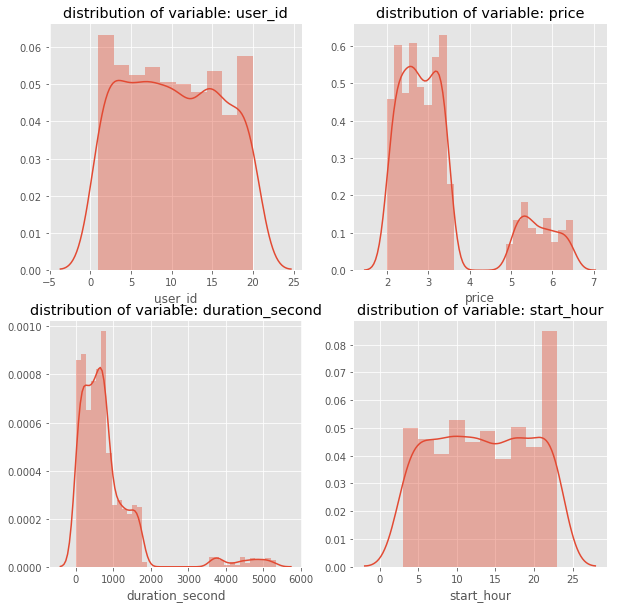

In [11]:
def plot_numeric_var(dataframe, numeric_cols, target_col):
    ncol = int(np.ceil(len(numeric_cols)/2))
    fig, axes= plt.subplots(ncol,2,figsize=(10,10))
    for idx, col_name in enumerate(numeric_cols):
        ax0=axes[int(np.floor(idx/2)),idx%2]
        ax0.set_title('distribution of variable: '+col_name)
        sns.distplot(dataframe[col_name], ax=ax0)

        
plot_numeric_var(data,numeric_cols = ['user_id', 'price' , 'duration_second', 'start_hour'], target_col = 'rating' )

Based on the plot below, We discovered: 
1. the **user_id** column indicate all users has been actively using this service. We don't find "new users"
2. **start_hour** column shows a uniformed demand over time 

#### Catgorical Variables

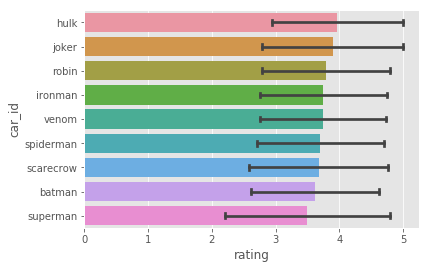

In [12]:
rating_mean = data.groupby(['car_id'])['rating'].mean().reset_index().sort_values(['rating'], ascending=False)
sns.barplot(y="car_id", x="rating",ci = 'sd',data=data, capsize=.2, order = rating_mean['car_id'])

We can see "hulk" performs the best while "superman" recieved lowest rating.

## Part 4:  Decision tree model to understand what features affect rating


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Prepare X and Y
x = data.drop(['start_time', 'end_time', 'rating'], axis=1)
X = pd.get_dummies(x, columns = ["user_id","car_id","region"])
Y = data['rating'] 
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.33, random_state=42)


clf = DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [19]:
print("model accuarcy on test dataset is: %0.4f " %(accuracy_score(y_test,pred)*100))
list(zip(list(X.columns),list(clf.feature_importances_)))

model accuarcy on test dataset is: 58.3578 


[('num_riders', 0.11104924086446676),
 ('num_near_misses', 0.0),
 ('price', 0.022914793021820076),
 ('duration_second', 0.691614301036163),
 ('start_hour', 0.016820958222643186),
 ('user_id_1', 0.015994665538022104),
 ('user_id_2', 0.012901953261181941),
 ('user_id_3', 0.03159401357908513),
 ('user_id_4', 0.0),
 ('user_id_5', 0.0),
 ('user_id_6', 0.0),
 ('user_id_7', 0.0),
 ('user_id_8', 0.0),
 ('user_id_9', 0.0),
 ('user_id_10', 0.0),
 ('user_id_11', 0.0),
 ('user_id_12', 0.0),
 ('user_id_13', 0.0),
 ('user_id_14', 0.0),
 ('user_id_15', 0.0),
 ('user_id_16', 0.0),
 ('user_id_17', 0.0),
 ('user_id_18', 0.0),
 ('user_id_19', 0.0),
 ('user_id_20', 0.0),
 ('car_id_batman', 0.0),
 ('car_id_hulk', 0.018138744759946583),
 ('car_id_ironman', 0.021066144854955983),
 ('car_id_joker', 0.0),
 ('car_id_robin', 0.0),
 ('car_id_scarecrow', 0.0),
 ('car_id_spiderman', 0.022427944296857582),
 ('car_id_superman', 0.008971177718743032),
 ('car_id_venom', 0.0),
 ('region_sf', 0.012397669208540718),
 ('re

We got a quick DT model for 58% accuarcy on validation set. This is by no mean a good model. However consider it's a mutliclass classification for 5 different ratings, this model is defintely better than random guess. Thus we can take a look to see which variables are contributing to the prediction. 

We find the **"duration_second"**, **"num_riders"** and **"num_near_misses"** are mostly relevant when predicting the rating. 

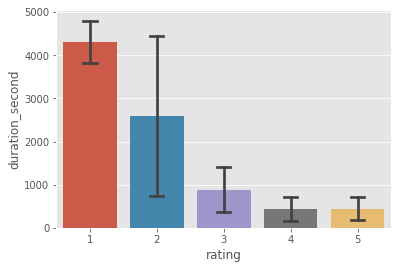

In [15]:
# Duration in second
sns.barplot(x="rating", y="duration_second",ci = 'sd',data=data, capsize=.2)

rating
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration_second, dtype: object

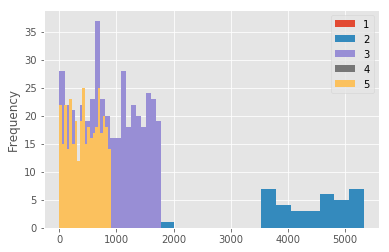

In [16]:
data.groupby('rating')["duration_second"].plot(kind = 'hist',bins=20,legend = True)

From these two plots above, we can clearly see a trend that the shorter the duration, the higher the rating. I would suggest business analyst to focus more on longer duration rides. Gather more information, for example track the distance of the ride. 

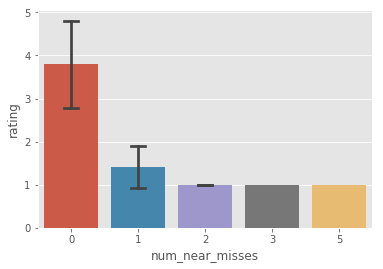

In [17]:
sns.barplot(x="num_near_misses", y="rating",ci = 'sd',data=data, capsize=.2)

## Part 5: Conclusion

In this exerice, data exploration, data correction and find 2 variables are useful for business analyst to investigate further. 

1. This is a small dataset of 1 day rider trips information.  
2. Data overall has good quality with one timestampe error. (fixed)  
3. **Rider duration in second** and **num_near_misses** are very relevant to customer satisfaction.

### Suggestions to business people:
1. To further understand Rider duration in second. 
    - We find the short the duration, the higher rating.  
    - Gather more information, for example track the distance of the ride. We need to understand the reason of long duration, whether it's a long distance ride? Or it's because the traffic is bad? Or it's the driver is using a wrong route? 
    - In order to get more information, we either retrieve existing information which didn't include in this table. Or create a survey/feedback loop to validate certain hypothesis. 

2. num_near_misses
    - The less miss, the higher that rating
    - Since we are autonomous vehicle business, I'm guessing the car itself is deciding which route to go. This column might means that the car missed the right way to go home either by traffic/riding algorithm doesn't allow or map inaccuarcy etc..  So it's could be improve by technical advancement. 
    - Understand the reason of near miss can be a start, then we can trace this issue back to map virtual world team, or planning team etc... 